## LeNet-5 Complete Architecture

LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition.


<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank">Paper: <u>Gradient-Based Learning Applied to Document Recognition</u></a>

**Authors**: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner<br>
**Published in**: Proceedings of the IEEE (1998)

## Structure of the LeNet network

LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. Here we analyze LeNet5 in depth. At the same time, through example analysis, deepen the understanding of the convolutional layer and pooling layer.

![lenet](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/lenet-5.png)


LeNet-5 Total seven layer , does not comprise an input, each containing a trainable parameters; each layer has a plurality of the Map the Feature , a characteristic of each of the input FeatureMap extracted by means of a convolution filter, and then each FeatureMap There are multiple neurons.

![lenet1](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/arch.jpg)

Detailed explanation of each layer parameter:

### **INPUT LAYER**

The first is the data INPUT layer. The size of the input image is uniformly normalized to 32 * 32.

> Note: This layer does not count as the network structure of LeNet-5. Traditionally, the input layer is not considered as one of the network hierarchy.


### **C1 layer-convolutional layer:**
- **Input picture**: 32 * 32
- **Convolution kernel size**: 5 * 5
- **Convolution kernel types**: 6
- **Output featuremap size**: 28 * 28 (32-5 + 1) = 28
- **Number of neurons**: 28 * 28 * 6
- **Trainable parameters**: (5 * 5 + 1) * 6 (5 * 5 = 25 unit parameters and one bias parameter per filter, a total of 6 filters)
- **Number of connections**: (5 * 5 + 1) * 6 * 28 * 28 = 122304

#### **Detailed description:** 
- The first convolution operation is performed on the input image (using 6 convolution kernels of size 5 * 5) to obtain 6 C1 feature maps (6 feature maps of size 28 * 28, 32-5 + 1 = 28). 

- Let's take a look at how many parameters are needed. The size of the convolution kernel is 5 * 5, and there are 6 * (5 * 5 + 1) = 156 parameters in total, where +1 indicates that a kernel has a bias. 

- For the convolutional layer C1, each pixel in C1 is connected to 5 * 5 pixels and 1 bias in the input image, so there are 156 * 28 * 28 = 122304 connections in total. There are 122,304 connections, but we only need to learn 156 parameters, mainly through weight sharing.


### **S2 layer-pooling layer (downsampling layer):**
- **Input**: 28 * 28
- **Sampling area**: 2 * 2
- **Sampling method**: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid
- **Sampling type**: 6
- **Output featureMap size**: 14 * 14 (28/2)
- **Number of neurons**: 14 * 14 * 6
- **Trainable parameters**: 2 * 6 (the weight of the sum + the offset)
- **Number of connections**: (2 * 2 + 1) * 6 * 14 * 14
- The size of each feature map in S2 is 1/4 of the size of the feature map in C1.

#### **Detailed description:** 
- The pooling operation is followed immediately after the first convolution. Pooling is performed using 2 * 2 kernels, and S2, 6 feature maps of 14 * 14 (28/2 = 14) are obtained. 

- The pooling layer of S2 is the sum of the pixels in the 2 * 2 area in C1 multiplied by a weight coefficient plus an offset, and then the result is mapped again. 

- So each pooling core has two training parameters, so there are 2x6 = 12 training parameters, but there are 5x14x14x6 = 5880 connections.


### **C3 layer-convolutional layer:**

- **Input**: all 6 or several feature map combinations in S2
- **Convolution kernel size**: 5 * 5
- **Convolution kernel type**: 16
- **Output featureMap size**: 10 * 10 (14-5 + 1) = 10
- Each feature map in C3 is connected to all 6 or several feature maps in S2, indicating that the feature map of this layer is a different combination of the feature maps extracted from the previous layer.
- One way is that the first 6 feature maps of C3 take 3 adjacent feature map subsets in S2 as input. The next 6 feature maps take 4 subsets of neighboring feature maps in S2 as input. The next three take the non-adjacent 4 feature map subsets as input. The last one takes all the feature maps in S2 as input.
- **The trainable parameters are**: 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) + 1 * (6 * 5 * 5 +1) = 1516
- **Number of connections**: 10 * 10 * 1516 = 151600

#### **Detailed description:** 

- After the first pooling, the second convolution, the output of the second convolution is C3, 16 10x10 feature maps, and the size of the convolution kernel is 5 * 5. We know that S2 has 6 14 * 14 feature maps, how to get 16 feature maps from 6 feature maps? Here are the 16 feature maps calculated by the special combination of the feature maps of S2. details as follows:

- The first 6 feature maps of C3 (corresponding to the 6th column of the first red box in the figure above) are connected to the 3 feature maps connected to the S2 layer (the first red box in the above figure), and the next 6 feature maps are connected to the S2 layer The 4 feature maps are connected (the second red box in the figure above), the next 3 feature maps are connected with the 4 feature maps that are not connected at the S2 layer, and the last is connected with all the feature maps at the S2 layer. The convolution kernel size is still 5 * 5, so there are 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) +1 * (6 * 5 * 5 + 1) = 1516 parameters. The image size is 10 * 10, so there are 151600 connections.

![lenet1](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/c31.png)

- The convolution structure of C3 and the first 3 graphs in S2 is shown below:

![lenet1](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/c32.png)


### **S4 layer-pooling layer (downsampling layer)**
- **Input**: 10 * 10
- **Sampling area**: 2 * 2
- **Sampling method**: 4 inputs are added, multiplied by a trainable parameter, plus a trainable offset. Results via sigmoid
- **Sampling type**: 16
- **Output featureMap size**: 5 * 5 (10/2)
- **Number of neurons**: 5 * 5 * 16 = 400
- **Trainable parameters**: 2 * 16 = 32 (the weight of the sum + the offset)
- **Number of connections**: 16 * (2 * 2 + 1) * 5 * 5 = 2000
- The size of each feature map in S4 is 1/4 of the size of the feature map in C3

#### **Detailed description:**
- S4 is the pooling layer, the window size is still 2 * 2, a total of 16 feature maps, and the 16 10x10 maps of the C3 layer are pooled in units of 2x2 to obtain 16 5x5 feature maps. This layer has a total of 32 training parameters of 2x16, 5x5x5x16 = 2000 connections. 

> *The connection is similar to the S2 layer.*

### **C5 layer-convolution layer**
- **Input**: All 16 unit feature maps of the S4 layer (all connected to s4)
- **Convolution kernel size**: 5 * 5
- **Convolution kernel type**: 120
- **Output featureMap size**: 1 * 1 (5-5 + 1)
- **Trainable parameters / connection**: 120 * (16 * 5 * 5 + 1) = 48120

#### **Detailed description:**
- The C5 layer is a convolutional layer. Since the size of the 16 images of the S4 layer is 5x5, which is the same as the size of the convolution kernel, the size of the image formed after convolution is 1x1. This results in 120 convolution results. Each is connected to the 16 maps on the previous level. So there are (5x5x16 + 1) x120 = 48120 parameters, and there are also 48120 connections. The network structure of the C5 layer is as follows:

![lenet1](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/c5.png)


### **F6 layer-fully connected layer**
- **Input**: c5 120-dimensional vector
- **Calculation method**: calculate the dot product between the input vector and the weight vector, plus an offset, and the result is output through the sigmoid function.
- **Trainable parameters**: 84 * (120 + 1) = 10164

#### **Detailed description:**
- Layer 6 is a fully connected layer. The F6 layer has 84 nodes, corresponding to a 7x12 bitmap, -1 means white, 1 means black, so the black and white of the bitmap of each symbol corresponds to a code. The training parameters and number of connections for this layer are (120 + 1) x84 = 10164. The ASCII encoding diagram is as follows:

![lenet1](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/f61.png)

- The connection method of the F6 layer is as follows:

![lenet1](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/f62.png)


### **Output layer-fully connected layer**

- The output layer is also a fully connected layer, with a total of 10 nodes, which respectively represent the numbers 0 to 9, and if the value of node i is 0, the result of network recognition is the number i. A radial basis function (RBF) network connection is used. Assuming x is the input of the previous layer and y is the output of the RBF, the calculation of the RBF output is:

![lenet1](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/81.png)

- The value of the above formula w_ij is determined by the bitmap encoding of i, where i ranges from 0 to 9, and j ranges from 0 to 7 * 12-1. The closer the value of the RBF output is to 0, the closer it is to i, that is, the closer to the ASCII encoding figure of i, it means that the recognition result input by the current network is the character i. This layer has 84x10 = 840 parameters and connections.

![lenet1](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/82.png)


## **Summary**
* LeNet-5 is a very efficient convolutional neural network for handwritten character recognition.
* Convolutional neural networks can make good use of the structural information of images.
* The convolutional layer has fewer parameters, which is also determined by the main characteristics of the convolutional layer, that is, local connection and shared weights.

### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

### Loading Dataset

In [2]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Image Data Preprocessing

In [3]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### LeNet Model Architecture

In [4]:
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3246 - accuracy: 0.9050 - val_loss: 0.0981 - val_accuracy: 0.9696
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0896 - accuracy: 0.9729 - val_loss: 0.0595 - val_accuracy: 0.9788
Epoch 3/20
469/469 [==============================] - 13s 29ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.0463 - val_accuracy: 0.9853
Epoch 4/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0388 - val_accuracy: 0.9869
Epoch 5/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0492 - val_accuracy: 0.9846
Epoch 6/20
469/469 [==============================] - 12s 27ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0407 - val_accuracy: 0.9870
Epoch 7/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0319 - val_accuracy:

In [7]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0367 - accuracy: 0.9905
Test Loss: 0.036672551184892654
Test accuracy: 0.9904999732971191


## 1. Замена Max Pooling на Average Pooling

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Building the Model Architecture
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 12s 25ms/step - loss: 0.3934 - accuracy: 0.8848 - val_loss: 0.1303 - val_accuracy: 0.9613
Epoch 2/20
469/469 [==============================] - 13s 27ms/step - loss: 0.1193 - accuracy: 0.9646 - val_loss: 0.0868 - val_accuracy: 0.9721
Epoch 3/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0872 - accuracy: 0.9728 - val_loss: 0.0733 - val_accuracy: 0.9771
Epoch 4/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0687 - accuracy: 0.9788 - val_loss: 0.0543 - val_accuracy: 0.9824
Epoch 5/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0506 - val_accuracy: 0.9843
Epoch 6/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0515 - val_accuracy: 0.9833
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.0407 - val_accuracy:

In [11]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

313/313 [==============================] - 1s 4ms/step - loss: 0.0379 - accuracy: 0.9894
Test Loss: 0.038
Test accuracy: 0.989


## 2. Эксперименты с количеством фильтров и нейронов в Dense слоях

In [14]:
model = Sequential()
model.add(Conv2D(12, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(240, activation='relu'))
model.add(Dense(168, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 17s 36ms/step - loss: 0.2233 - accuracy: 0.9334 - val_loss: 0.0642 - val_accuracy: 0.9786
Epoch 2/20
469/469 [==============================] - 16s 34ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0589 - val_accuracy: 0.9809
Epoch 3/20
469/469 [==============================] - 16s 35ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 4/20
469/469 [==============================] - 16s 34ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0365 - val_accuracy: 0.9870
Epoch 5/20
469/469 [==============================] - 17s 35ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 6/20
469/469 [==============================] - 16s 34ms/step - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0439 - val_accuracy: 0.9862
Epoch 7/20
469/469 [==============================] - 16s 35ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0272 - val_accuracy:

In [17]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

313/313 [==============================] - 2s 5ms/step - loss: 0.0383 - accuracy: 0.9916
Test Loss: 0.038
Test accuracy: 0.992


## 3. Загрузка датасета с другим алфавитом и обучение 

In [30]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
train = pd.read_csv("../input/emnist/emnist-balanced-train.csv",delimiter = ',') 
test = pd.read_csv("../input/emnist/emnist-balanced-test.csv", delimiter = ',')
mapp = pd.read_csv("../input/emnist/emnist-balanced-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None, squeeze=True)
print("Train: %s, Test: %s, Map: %s" %(train.shape, test.shape, mapp.shape))

Train: (112799, 785), Test: (18799, 785), Map: (47,)


In [23]:
# Constants
HEIGHT = 28
WIDTH = 28

In [24]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
del test

In [25]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(112799, 784) (112799,) (18799, 784) (18799,)


In [26]:
def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [27]:
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (112799, 28, 28)
test_x: (18799, 28, 28)


In [28]:
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

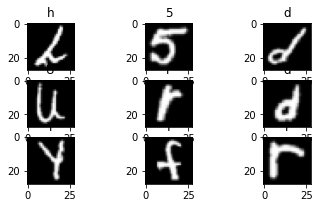

In [31]:
for i in range(100, 109):
    plt.subplot(330 + (i+1))
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    plt.title(chr(mapp[train_y[i]]))

In [32]:
num_classes = train_y.nunique()

In [34]:
from keras.utils import np_utils

# One hot encoding
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112799, 47)
test_y:  (18799, 47)


In [35]:
# Reshape image for CNN
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [38]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3165 - accuracy: 0.9076 - val_loss: 0.1065 - val_accuracy: 0.9679
Epoch 2/20
469/469 [==============================] - 13s 27ms/step - loss: 0.1023 - accuracy: 0.9677 - val_loss: 0.0690 - val_accuracy: 0.9757
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0751 - accuracy: 0.9765 - val_loss: 0.0659 - val_accuracy: 0.9788
Epoch 4/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0511 - val_accuracy: 0.9827
Epoch 5/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0510 - val_accuracy: 0.9835
Epoch 6/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0382 - val_accuracy: 0.9874
Epoch 7/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0369 - val_accuracy:

In [39]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

313/313 [==============================] - 1s 4ms/step - loss: 0.0437 - accuracy: 0.9901
Test Loss: 0.044
Test accuracy: 0.99
